<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-RobertoRomeroVielma-A00822314/blob/main/Actividad_Semanal_6%2C_visualizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Materia: Ciencia y Analítica de Datos.
* Nombre de la entrega: Actividad Semanal -- 6, visualización
* Fecha: 01/11/2022.
* Roberto Romero Vielma - A00822314
* Profesora titular: María de la Paz Rico Fernández
* Profesor tutor: Roberto Antonio Guevara González.

Importamos las librerías

In [42]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos el conjunto de datos en el notebook

In [43]:
credit=pd.read_csv("https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv")

Nombre del conjunto de datos: **Default of credit card clients Data Set**

Página donde se encuentra el conjunto de datos: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

Descripción del conjunto de datos:
El dataset cuenta con información de los clientes de un banco de Taiwan, las features dentro del dataset son:
* Id del cliente
* Género
* Educación
* Estado civil
* Edad
* Historial de pagos
* Estados de cuenta mes con mes

Nombre de quien generó el dataset: I-Cheng Yeh

Información general: 
Institución: Department of Information Management, Chung Hua University, Taiwan.

# Información del Dataframe

Obtener la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [44]:
credit.head() #visualizamos las primeras 5 filas del dataset

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


Ver el tamaño del dataset

In [45]:
credit.shape # 30 mil filas y 25 columnas

(30000, 25)

Nombres de las columnas

In [46]:
credit.columns

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

Tipo de dato de cada columna

In [47]:
credit.dtypes

ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

Obtenemos la información del dataset

In [48]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

Visualizamos si el dataset cuenta con valores faltantes

In [49]:
credit.isna()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [50]:
credit.isnull().sum() #valores faltantes en cada columna

ID      0
X1      0
X2      1
X3      2
X4      2
X5      5
X6      3
X7      5
X8      7
X9      9
X10    16
X11    14
X12    11
X13    11
X14    13
X15    15
X16    17
X17    10
X18     8
X19     9
X20     8
X21    11
X22    11
X23     5
Y       3
dtype: int64

# Registros nulos
Verificamos cuantos valores se tendrían en caso de optar por eliminar valores faltantes

In [51]:
credit_full=credit.copy() #dataset original
credit_notnull=credit.dropna() #dataset sin valores faltantes

In [52]:
full=len(credit_full)
notnull=len(credit_notnull)
print("Tamaño del dataset original:",full)
print("Tamaño del dataset después de eliminar datos nulos:",notnull)
print( "Porcentaje de datos conservados después de usar el método dropna():"  ,((notnull*100)/(full)))

Tamaño del dataset original: 30000
Tamaño del dataset después de eliminar datos nulos: 29958
Porcentaje de datos conservados después de usar el método dropna(): 99.86


Dado que la información pérdida no es mayor al 5%, es factible eliminar los registros faltantes 

Verificamos que los datos se encuentren dentro de los rangos establecidos en la documentación

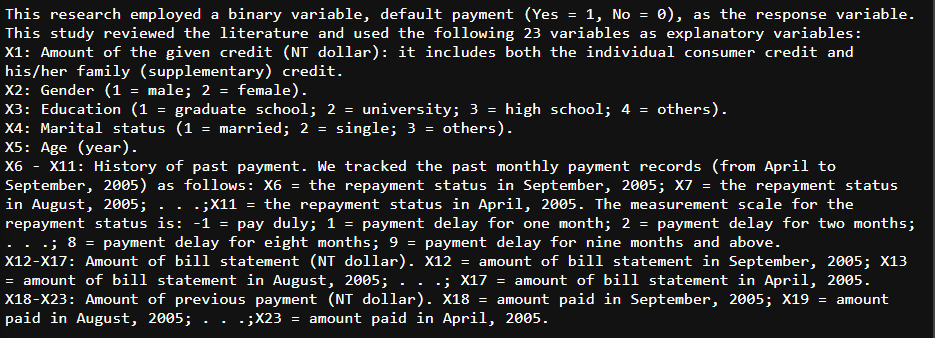

Usamos un for loop para visualizar los valores y corroborar que todos se encuentren dentro del rango presente en la documentación

In [53]:
columns=credit_notnull.loc[:,"X3":"X11"]
for i in columns.columns:
   valores_unicos=credit_notnull[i].unique()
   if(len(valores_unicos)>30): #saltamos la columna X5
    pass
   else:
    print(credit_notnull[i].name,": ",sorted(valores_unicos))


X3 :  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
X4 :  [0.0, 1.0, 2.0, 3.0]
X6 :  [-2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
X7 :  [-2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
X8 :  [-2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
X9 :  [-2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
X10 :  [-2.0, -1.0, 0.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
X11 :  [-2.0, -1.0, 0.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]


Diferentes columnas presentan valores erróneos por lo cual se utilizará el método replace para rellenarlos

In [54]:
clean_credit=credit_notnull.copy()
clean_credit["X3"] = clean_credit[["X3"]].replace([0,5,6],4)
clean_credit["X4"]=clean_credit[["X4"]].replace(0,3)
slc = clean_credit.loc[ : , "X6":"X11"]
for c in slc.columns:
  clean_credit[c] = clean_credit[[c]].replace([-2,0],-1)

Corroboramos que todos los valores se encuentren dentro del rango correcto

In [55]:
columns=clean_credit.loc[:,"X3":"X11"]
for i in columns.columns:
   valores_unicos=clean_credit[i].unique()
   if(len(valores_unicos)>30):
    pass
   else:
    print(credit_notnull[i].name,": ",sorted(valores_unicos))

X3 :  [1.0, 2.0, 3.0, 4.0]
X4 :  [1.0, 2.0, 3.0]
X6 :  [-1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
X7 :  [-1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
X8 :  [-1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
X9 :  [-1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
X10 :  [-1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
X11 :  [-1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]


#Estadística descriptiva
Calcular la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [56]:
numeric_data=clean_credit[["X1","X12","X13","X14","X15","X16","X17","X18","X19","X20","X21","X22","X23"]] #obtenemos las columnas númericas del dataset

In [57]:
numeric_data.describe()

,X1,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
count,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000
mean,167555.900928,51248.119901,49200.493825,4.703239e+04,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025
std,129737.299088,73674.949943,71211.232744,6.938524e+04,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767
min,10000.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,3559.250000,2984.000000,2.664750e+03,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000
50%,140000.000000,22379.000000,21194.500000,2.008550e+04,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,67190.000000,64027.750000,6.018300e+04,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000
max,1000000.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


La mitad de los datos en X1 se encuentran en el rango de 140 mil, mientras que en las demás variables númericas oscilan entre 150 mil y 200 mil, los montos máximos para todas las variables se encuentran cercanos a 1 millón.

# Realización del conteo de las variables categóricas

In [58]:
categorical_data=clean_credit[["X2","X3","X4"]] 
for i in categorical_data.columns:
  value_count=categorical_data[[i]].value_counts()
  print(value_count)

X2 
2.0    18095
1.0    11863
dtype: int64
X3 
2.0    14009
1.0    10572
3.0     4909
4.0      468
dtype: int64
X4 
2.0    15939
1.0    13643
3.0      376
dtype: int64


# Escalar los datos

In [59]:
pcs = PCA()
pcs.fit(preprocessing.scale(numeric_data)) #PCA solo acepta valores númericos por ello se uso el df llamado numeric_data

PCA()

# Reducir las dimensiones con PCA
* Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%


In [60]:
Summary_df = pd.DataFrame({'Desviación estándar': np.sqrt(pcs.explained_variance_),
                             'Proporción de la varianza': pcs.explained_variance_ratio_,
                             'Proporción acumulativa': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = Summary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Desviación estándar,2.4318,1.3085,0.9707,0.9402,0.9347,0.8845,0.8607,0.8523,0.5143,0.2665,0.2026,0.1592,0.1525
Proporción de la varianza,0.4549,0.1317,0.0725,0.0680,0.0672,0.0602,0.0570,0.0559,0.0203,0.0055,0.0032,0.0019,0.0018
Proporción acumulativa,0.4549,0.5866,0.6591,0.7271,0.7943,0.8544,0.9114,0.9673,0.9876,0.9931,0.9963,0.9982,1.0000


Observamos que con el componente principal 4 se cuenta con el 72% de la varianza

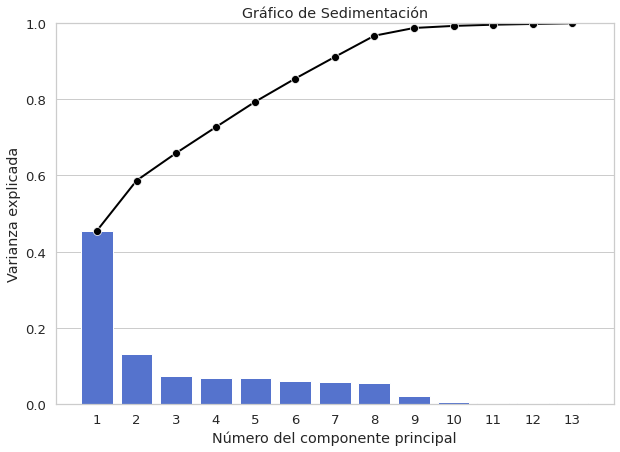

In [61]:
PC_components = np.arange(pcs.n_components_) + 1 # sumamos +1 por que el arrange te da menos -1 el rango

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'royalblue'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Gráfico de Sedimentación')
plt.xlabel('Número del componente principal')
plt.ylabel('Varianza explicada')
plt.ylim(0, 1)
plt.show()

Dado que con PC4 se tiene casi toda la varianza (alrededor del 72%), se tomará hasta este valor de la proporción de la varianza

In [62]:
pc_70 = pcsSummary_df.round(4)
pc_70.iloc[: , :4]

,PC1,PC2,PC3,PC4
Desviación estándar,2.4318,1.3085,0.9707,0.9402
Proporción de la varianza,0.4549,0.1317,0.0725,0.0680
Proporción acumulativa,0.4549,0.5866,0.6591,0.7271


Proporción acumulativa en PC4

In [63]:
pcsSummary_df.iloc[2,3]

0.7270642930425232

* Indica la importancia de las variables en cada componente

A continuación se visualizará la composición arrojada por cada componente del PCA

In [64]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSummary_df.columns,
                                index=numeric_data.columns
                                )
pcsComponents_df= pcsComponents_df.iloc[:,:]
pcsComponents_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
X1,0.164821,0.293951,-0.392929,0.051168,-0.104442,0.255897,-0.800314,0.106114,-0.031168,-0.006176,0.015486,-0.000396,0.003506
X12,0.372685,-0.190703,-0.074363,0.040767,-0.038684,0.003202,0.017836,0.006718,0.566665,0.416023,-0.432994,-0.183815,-0.316575
X13,0.383520,-0.174107,0.003749,0.084287,-0.025024,-0.033223,-0.012841,-0.136093,0.386852,0.038427,0.344977,0.329514,0.645248
X14,0.388541,-0.125829,0.072482,0.110977,0.102285,-0.115389,-0.025799,0.096941,0.122913,-0.484780,0.495825,-0.086494,-0.527589
X15,0.391850,-0.119224,0.080828,0.030669,0.011442,0.122134,0.045429,0.033409,-0.205316,-0.523208,-0.489670,-0.362061,0.346080
X16,0.388805,-0.104580,0.050685,-0.102067,-0.103734,-0.014053,0.034811,0.044220,-0.420003,0.068371,-0.249475,0.718369,-0.226743
X17,0.380968,-0.092774,-0.044910,-0.172261,0.069223,-0.005083,0.065330,-0.011980,-0.488817,0.513309,0.338713,-0.427727,0.072324
X18,0.135142,0.386065,0.394230,0.235987,0.033602,-0.179313,-0.167904,-0.735310,-0.056556,0.047513,-0.069349,-0.044847,-0.084572
X19,0.116787,0.411567,0.410514,0.142616,0.399039,-0.250852,-0.074504,0.595197,0.050891,0.147307,-0.068860,0.038933,0.124885
X20,0.128043,0.394763,0.265181,-0.224107,-0.134503,0.752154,0.285234,0.029155,0.144975,0.000138,0.124675,0.025425,-0.063084


In [65]:
max_value=pcsComponents_df.abs().max()
dic1=dict(max_value)
id_col=pcsComponents_df.abs().idxmax()
dic2=dict(id_col)

Ciclo for para obtener la importancia de cada variable en cada componente

In [66]:
result = {}
for key in (dic1.keys() | dic2.keys()):
    if key in dic1: result.setdefault(key, []).append(dic1[key])
    if key in dic2: result.setdefault(key, []).append(dic2[key])

print(sorted(result.items()))

[('PC1', [0.3918501105793152, 'X15']), ('PC10', [0.5232078308962036, 'X15']), ('PC11', [0.49582487539232495, 'X14']), ('PC12', [0.7183693200713235, 'X16']), ('PC13', [0.6452481823611195, 'X13']), ('PC2', [0.41156698308879397, 'X19']), ('PC3', [0.5344893449616073, 'X22']), ('PC4', [0.6529481527221593, 'X23']), ('PC5', [0.6381422528088617, 'X22']), ('PC6', [0.7521537439884168, 'X20']), ('PC7', [0.8003138493850573, 'X1']), ('PC8', [0.7353099916482858, 'X18']), ('PC9', [0.5666648719347813, 'X12'])]


# Elaboración de histogramas de los atributos para visualizar su distribución

Para graficar más fácilmente se definió una función para graficar todas las variables numéricas

In [67]:
def hist_plot(x):
  plt.hist(numeric_data[x], bins=20, facecolor='royalblue')
  plt.title(x)
  plt.show()

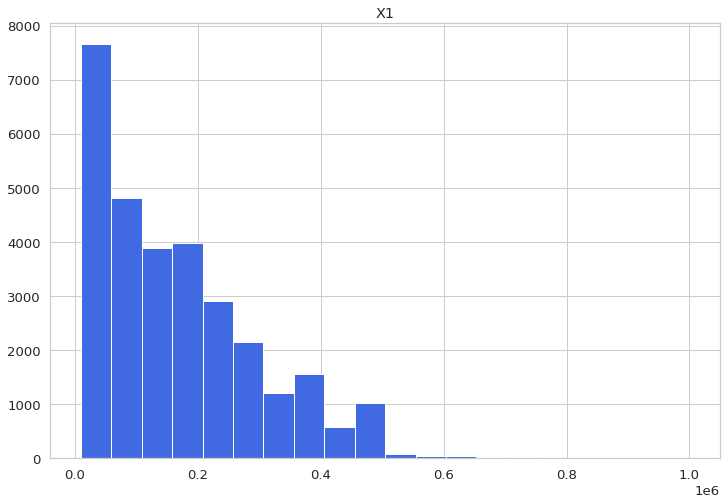

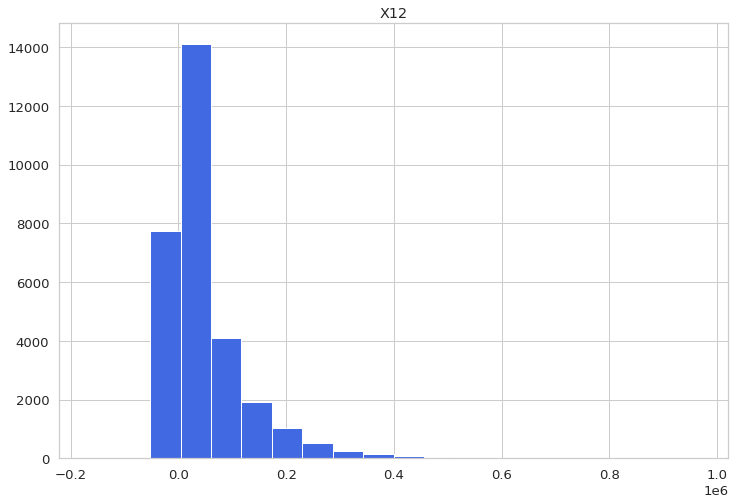

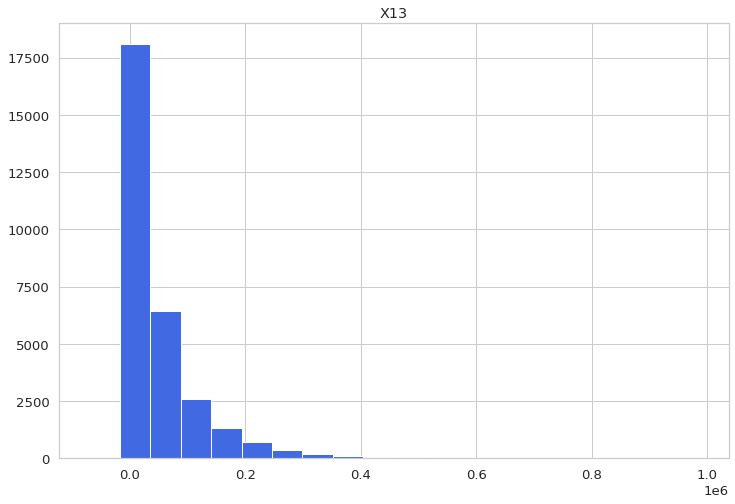

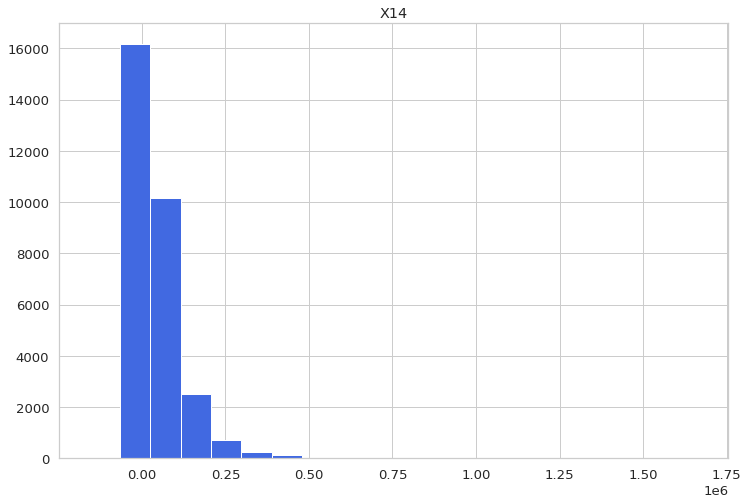

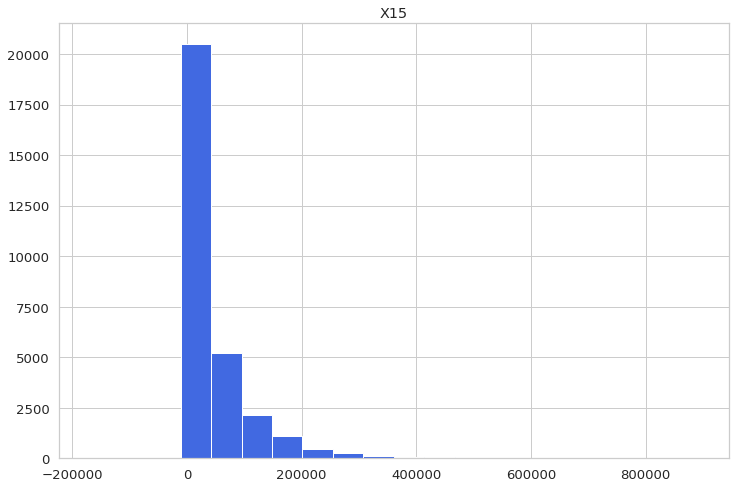

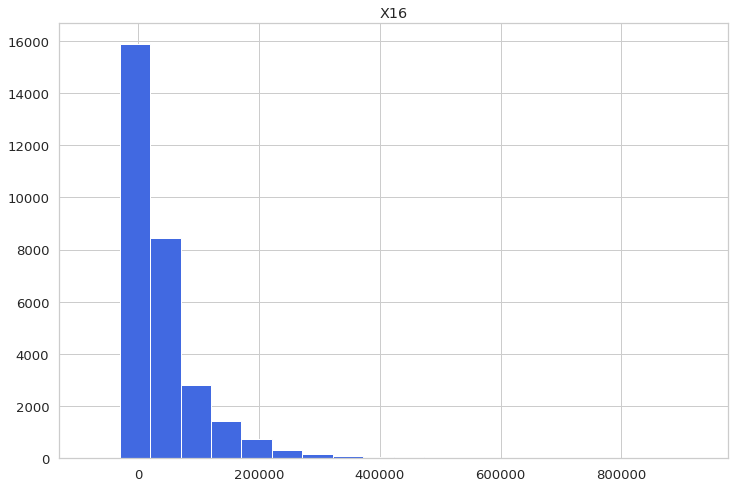

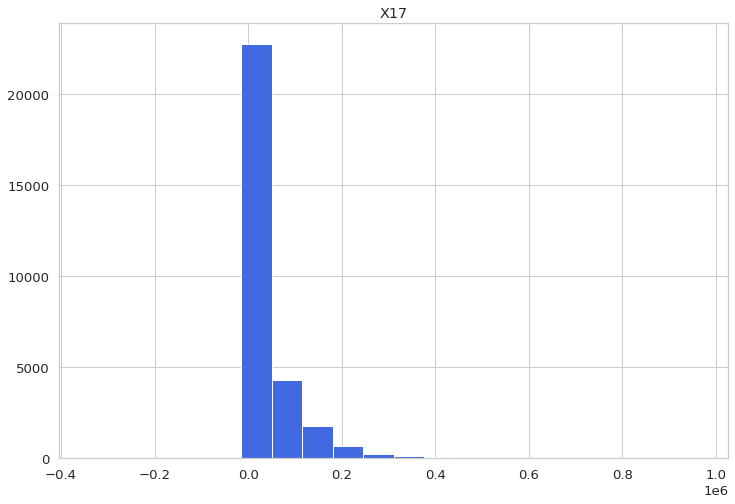

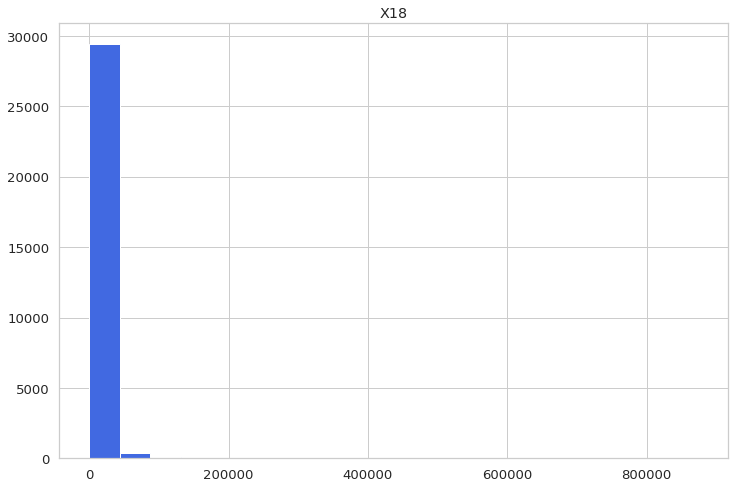

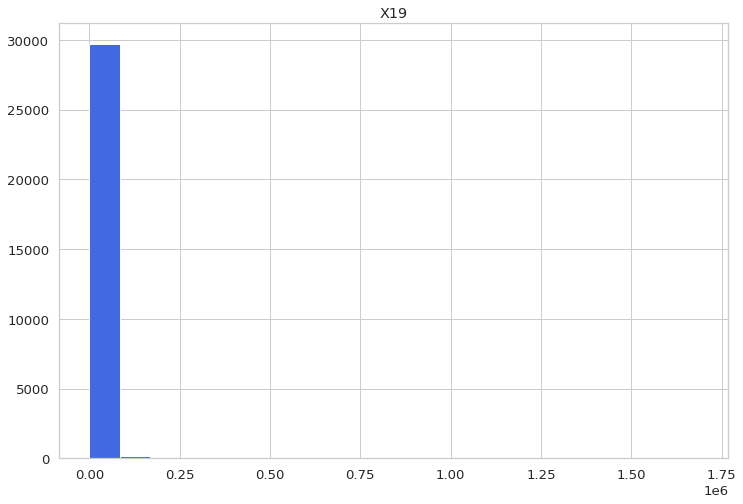

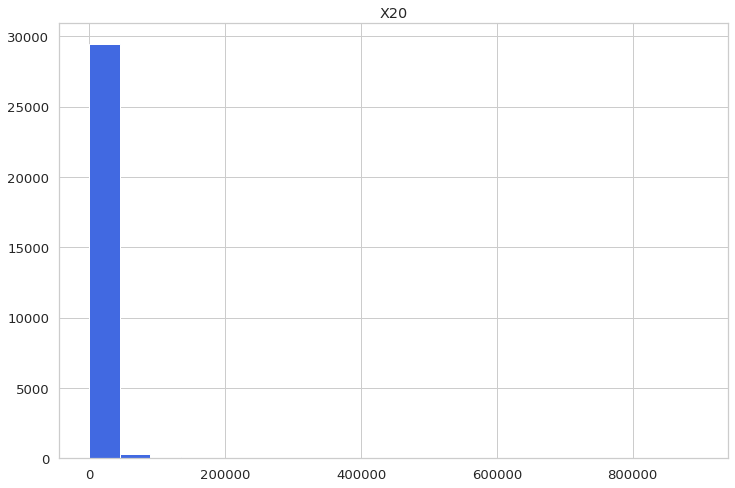

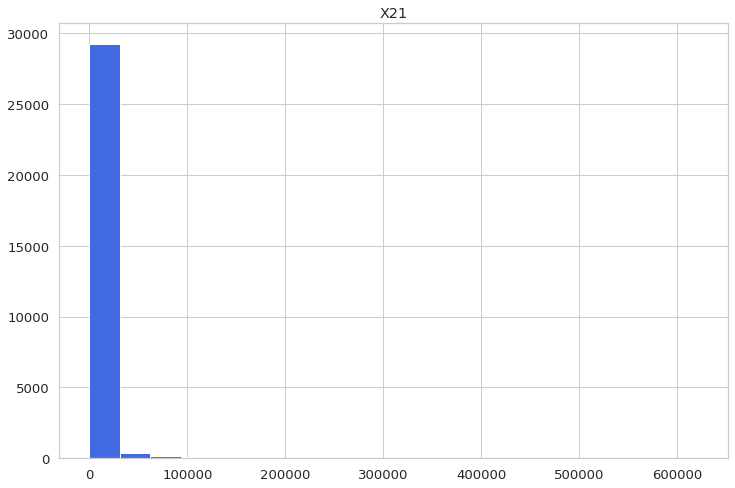

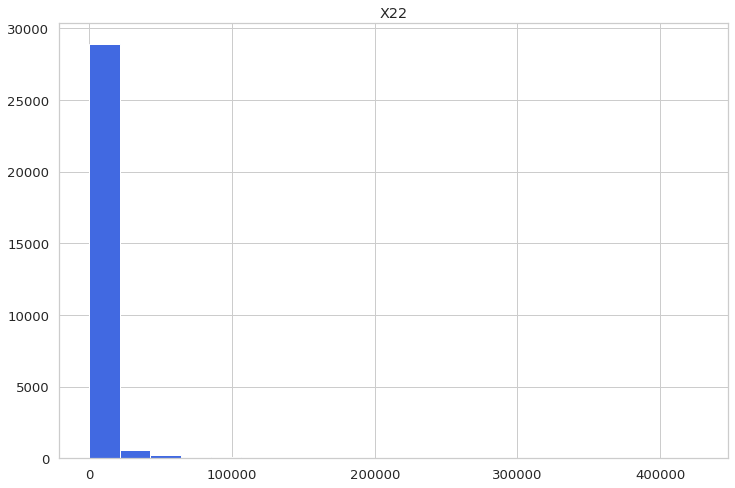

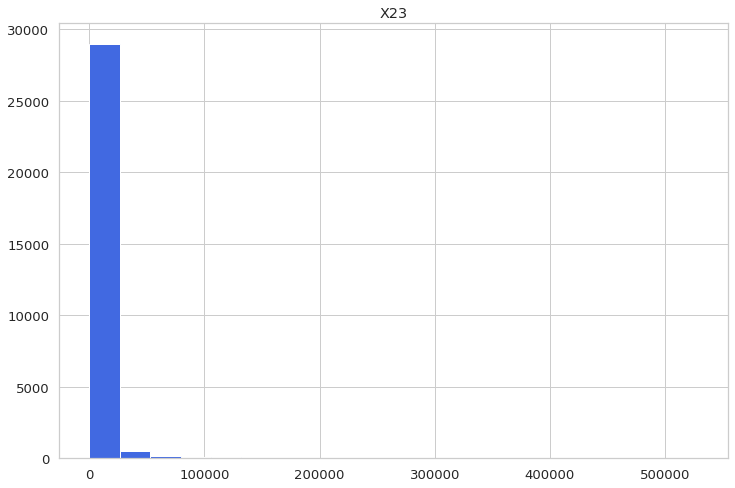

In [68]:
for i in numeric_data.columns:
  hist_plot(i)


# Visualización de los datos usando por lo menos 3 gráficos

In [139]:
num_sca=numeric_data.copy()

Renombramos las columnas a utilizar

In [140]:
num_sca.columns=["X1","Bill statement Sep","Bill statement Aug","Bill statement Jul","Bill statement Jun","Bill statement May","Bill statement Apr","X18","X19","X20","X21","X22","X23"]

Graficamos el estado de cuenta de los clientes mes con mes

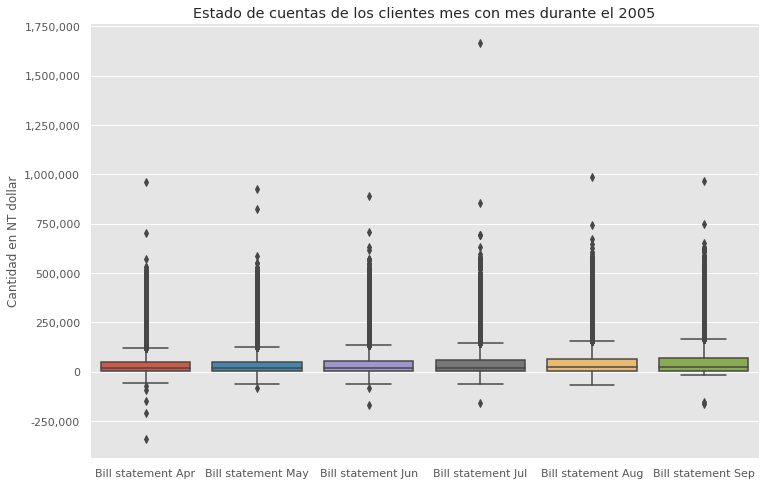

In [153]:
sns.boxplot(data=num_sca[["Bill statement Apr","Bill statement May","Bill statement Jun","Bill statement Jul","Bill statement Aug","Bill statement Sep"]])
plt.title("Estado de cuentas de los clientes mes con mes durante el 2005")
plt.ylabel("Cantidad en NT dollar")
real_quantity = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in real_quantity])
plt.show()

Ahora gráficamos para saber si la edad influye al momento de otorgar una línea de crédito

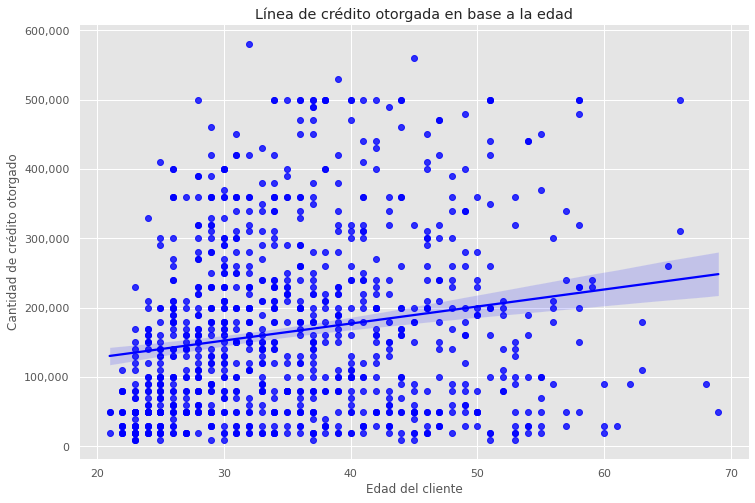

In [154]:
num_samples=clean_credit.sample(n=1000) #agarramos 1000 muestras aleatorias para no sezgar la información
plt.style.use("ggplot")
sns.regplot(x="X5", 
            y="X1", 
            data=num_samples,
            color="blue") 
plt.title("Línea de crédito otorgada en base a la edad")
plt.xlabel("Edad del cliente")
plt.ylabel("Cantidad de crédito otorgado")
real_quantity = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in real_quantity])
plt.show()

Visualizamos que tipo de clientela es la que pide más crédito

[Text(0, 0, '-200,000'),
 Text(0, 0, '0'),
 Text(0, 0, '200,000'),
 Text(0, 0, '400,000'),
 Text(0, 0, '600,000'),
 Text(0, 0, '800,000'),
 Text(0, 0, '1,000,000'),
 Text(0, 0, '1,200,000')]

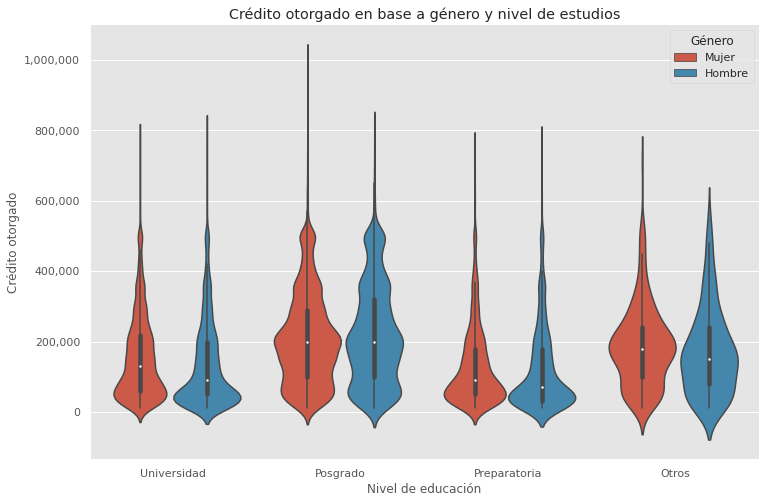

In [151]:
client_info=clean_credit.copy()
client_info.X3.replace(1.0,"Posgrado",inplace=True)
client_info.X3.replace(2.0,"Universidad",inplace=True)
client_info.X3.replace(3.0,"Preparatoria",inplace=True)
client_info.X3.replace(4.0,"Otros",inplace=True)


client_info.X2.replace(1,"Hombre",inplace=True)
client_info.X2.replace(2,"Mujer",inplace=True)

client_info.rename(columns={'X2':'Género'}, inplace=True)

sns.violinplot(data=client_info, x="X3", y="X1", hue="Género")
plt.title("Crédito otorgado en base a género y nivel de estudios")
plt.xlabel("Nivel de educación")
plt.ylabel("Crédito otorgado")
real_quantity = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in real_quantity])

# Interpretación y explicación de cada uno de los gráficos, indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

Del gráfico 1 se observa el siguiente comportamiento:

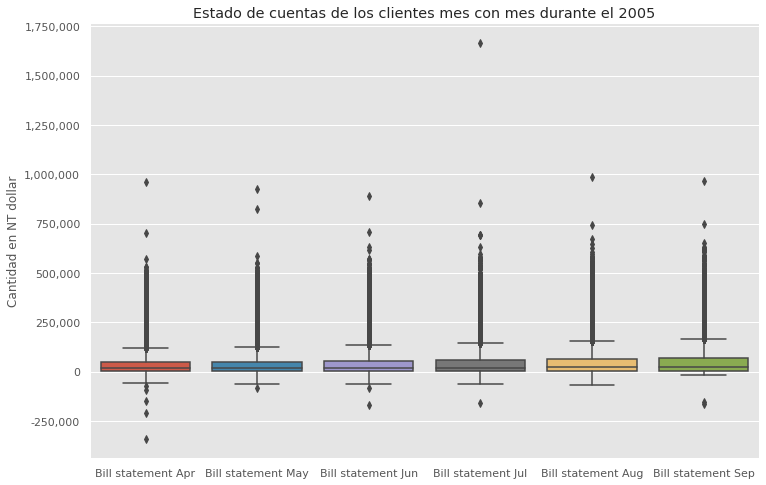

Se observan estados de cuenta negativos, mismos que pueden atribuirse a reembolsos, que llegan a montos superiores de 200 mil doláres taiwaneses, mientras que el estado de cuenta más alto está por encima de 1 millón de doláres, en general las distribuciones mes con mes se mantienen estables, la información más relevante que observo y que puede ayudar en la toma de decisiones es que en Abril, al parecer hay una ligera variación, misma que puede ser explicada por la ley de Antisecesión por parte de China que ocurrió entre el período de Marzo y Abril del 2005, por lo cuál en ese período hubiera sido recomendable subir las tasas de interés por la incertidumbre política que se enfrentaba.

Del segundo gráfico se puede observar lo siguiente:

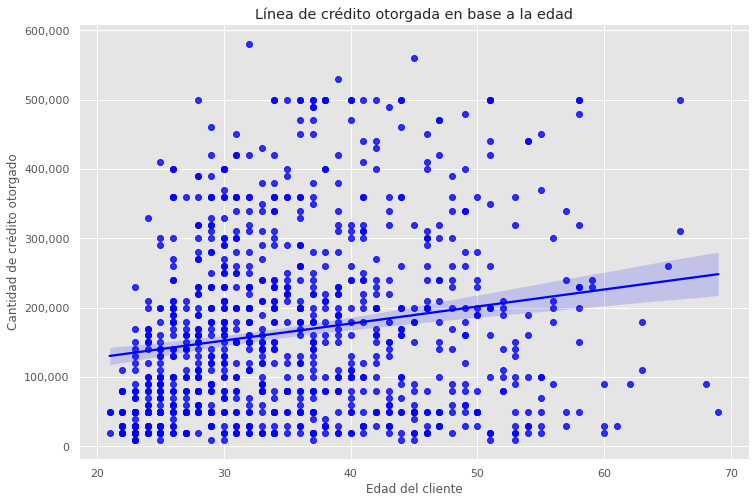

La mayoría de los clientes cuentan con un crédito que oscila entre 100 mil y 300 mil doláres y la edad al parecer no está correlacionada con la cantidad de crédito aprobado para los clientes, por lo que en la toma de decisiones **no debería usarse la edad como un factor para determinar la cantidad de crédito otorgado**.

Por último, el tercer gráfico nos permite concluir lo siguiente:

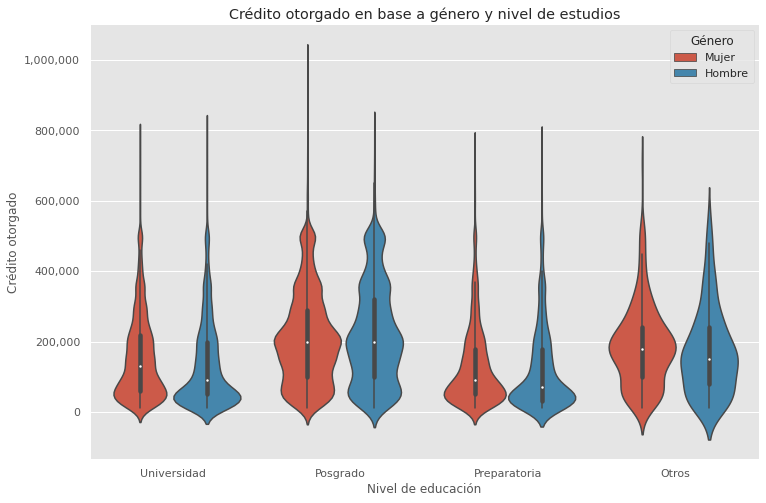

A mayor grado de estudios, el crédito otorgado aumenta de manera significativa, nuevamente el rango de crédito está dentro de los 100 mil y los 300 mil doláres para la mayoría de los clientes, sin embargo a las mujeres les otorgan más crédito que a los hombres, por lo que en la toma de decisiones será importante considerar, que las mujeres con mayor grado de estudios consiguen los mejores créditos, por lo que el equipo de marketing debe diseñar estrategias para atraer a más mujeres con mayor preparación al banco.

# Conclusión
La edad no influirá en la cantidad de crédito que se le otorga a un cliente, sin embargo, el grado máximo de estudios y el género si deberán considerse al momento de otorgar créditos, el análsis PCA mostró que con 4 componentes principales se obtiene arriba del 70% de la varianza, lo que contribuirá a reducir la dimensionalidad de futuros modelos.

#Referencias bibliográficas

* Reinoso, J. (2005, 7 marzo). La ley antisecesión ahonda la brecha entre chinos y taiwaneses. El País. https://elpais.com/diario/2005/03/07/internacional/1110150011_850215.html

* Das, A. (2019). Data Visualization in Data Science. Towards Data Science. https://towardsdatascience.com/data-visualization-in-data-science-5681cbdde5bf